# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [6]:
import pandas as pd
from functools import reduce
from statistics import mean
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [2]:
dataset = pd.read_csv("data/salary_data.csv")
training_data, testing_data = train_test_split(dataset, test_size=0.2, random_state=2)
exp = training_data['YearsExperience'].tolist()
sal = training_data['Salary'].tolist()
log_sal = np.where(training_data['Salary']<60000,1,0)
exp_test = testing_data['YearsExperience'].tolist()
sal_test = testing_data['Salary'].tolist()

log_sal_test = np.where(testing_data['Salary']<60000,1,0)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [3]:
w=13000
b=2000
n=0.01
m=len(exp)
# print(exp)
# training 
for i in range(10000):
    y_val = list(map(lambda x:w*x+b,exp))
    cost = reduce(lambda a,b:a+b, list(map(lambda x,y:(x-y)**2,sal,y_val)),0)/m
    grad_w= reduce(lambda a,b:a+b,list(map(lambda y1,y,x:(y1-y)*x,y_val,sal,exp)),0)*2/m
    grad_b= reduce(lambda a,b:a+b,list(map(lambda y1,y:(y1-y),y_val,sal)),0)*2/m
    w = w-(n*grad_w)
    b = b-(n*grad_b)
# print(y_val)    
# print(cost)
# # predicting
# l=len(exp_test)
# k=0
# print("w:",w,' ',"b:",b)
# y_test = list(map(lambda x:w*x+b,exp_test))
# print("Step count:10000")
# print(sal_test)
# print(y_test)


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [4]:
w1=13000
b1=2000
n=0.01
m=len(exp)

for i in range(10000):
    y_val = list(map(lambda x:1/(1+np.exp(-1*(w1*x+b1))),exp))
    cost = (-1)*reduce(lambda a,b:a+b, list(map(lambda y,y_pred:y*np.log(y_pred)+(1-y)*np.log(1-y_pred),log_sal,y_val)),0)/m
    grad_w= reduce(lambda a,b:a+b,list(map(lambda y1,y,x:(y1-y)*x,y_val,log_sal,exp)),0)*2/m
    grad_b= reduce(lambda a,b:a+b,list(map(lambda y1,y:(y1-y),y_val,log_sal)),0)*2/m
    w1 = w1-(n*grad_w)
    b1 = b1-(n*grad_b)


<ipython-input-4-1c0dd997d8bd>:8: RuntimeWarning: divide by zero encountered in log
  cost = (-1)*reduce(lambda a,b:a+b, list(map(lambda y,y_pred:y*np.log(y_pred)+(1-y)*np.log(1-y_pred),log_sal,y_val)),0)/m
<ipython-input-4-1c0dd997d8bd>:8: RuntimeWarning: invalid value encountered in multiply
  cost = (-1)*reduce(lambda a,b:a+b, list(map(lambda y,y_pred:y*np.log(y_pred)+(1-y)*np.log(1-y_pred),log_sal,y_val)),0)/m


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

R2 : 0.8886956733784535
MAE : 6802.779572073973
RMSE: 35385.631043899724


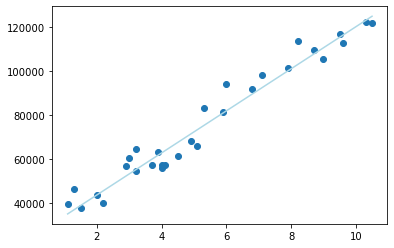

In [12]:
#Linear Regression analysis
#Calculation for R2
pred_sal = list(map(lambda x:w*x+b,exp_test))
avg_sal = mean(sal_test)
ss_res = reduce(lambda a,b:a+b,list( map(lambda y,y_pred:(y-y_pred)**2,sal_test,pred_sal) ),0)
ss_tot = reduce(lambda a,b:a+b,list( map(lambda y:(y-avg_sal)**2,sal_test) ),0)
r2 = 1-(ss_res/ss_tot)
print("R2 :",r2)

#Calculation for MAE
mae = reduce(lambda a,b:a+b,list( map(lambda y,y_pred:abs(y-y_pred),sal_test,pred_sal) ))/len(exp_test)
print("MAE :",mae)

#Calculation for RMSE
rmse = math.sqrt(reduce(lambda a,b:a+b, list(map(lambda x,y:(x-y)**2,sal,y_val)),0)/m)
print("RMSE:",rmse)

#graph
x_val=dataset['YearsExperience'].tolist()
y_val_pred = list(map(lambda x:w*x+b,x_val))
y_val=dataset['Salary'].tolist()
plt.plot(x_val,y_val_pred,color='lightblue')
plt.scatter(x_val,y_val)

[1 1 0 1 0 0]
[17555.499999989843, 15141.83333332476, 56174.16666663121, 46519.49999997087, 87551.83333327732, 74276.66666661935]
Accuracy: 83.33333333333333


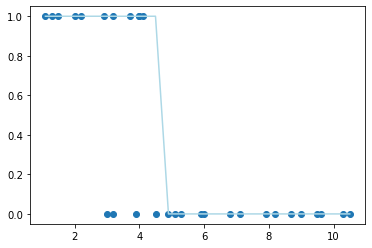

In [9]:
#Logistic Regression analysis
y_test = list(map(lambda x:w1*x+b1,exp_test))
print(log_sal_test)
print(y_test)

k=0
l=len(exp_test)
for i in range(l):
    val=1 if y_test[i]<60000 else 0
    if(val==log_sal_test[i]):
        k+=1
print("Accuracy:",k*100/l)
y_val1=np.where(dataset['Salary']<60000,1,0)
y_val_pred=list(map(lambda x:w1*x+b1,x_val))
y_val_pred1=[1 if x<60000 else 0 for x in y_val_pred]

#decision boundary plot
plt.plot(x_val,y_val_pred1,color='lightblue')
plt.scatter(x_val,y_val1)